In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from euclid_smudge import EuclidOverlapFootprint
import healpy as hp
from rubin_sim.utils import _hpid2_ra_dec, angular_separation, gnomonic_project_toxy


In [3]:
names = ['RA', 'dec']
types = [float, float]
euclid_contours = np.genfromtxt('EWS.SGC.Mainland.ROI.2022.RADEC.txt',
                                        dtype=list(zip(names, types)))

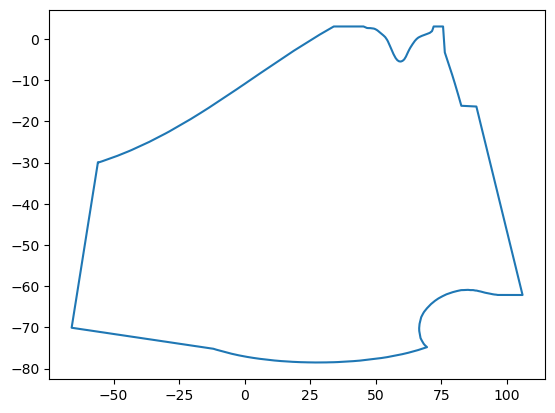

In [4]:
plt.plot(euclid_contours['RA'], euclid_contours['dec'])

In [5]:
nside=32
fp = EuclidOverlapFootprint(nside=nside)
footprints_hp_array, labels = fp.return_maps()

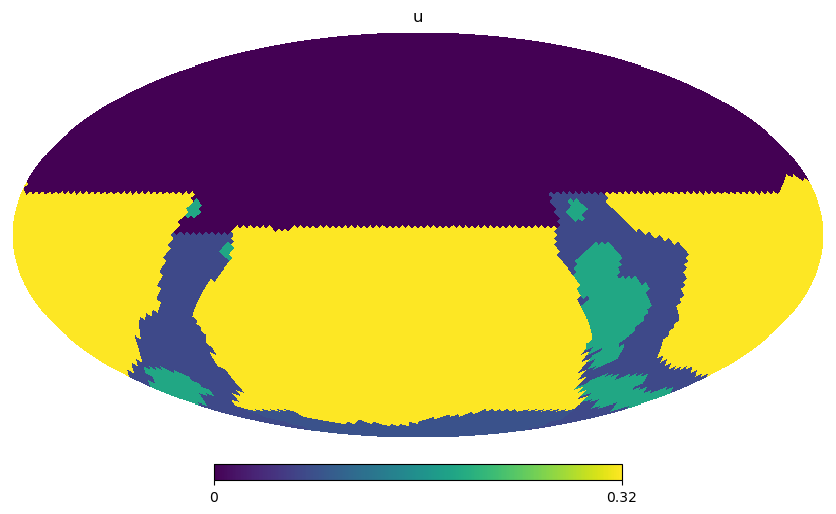

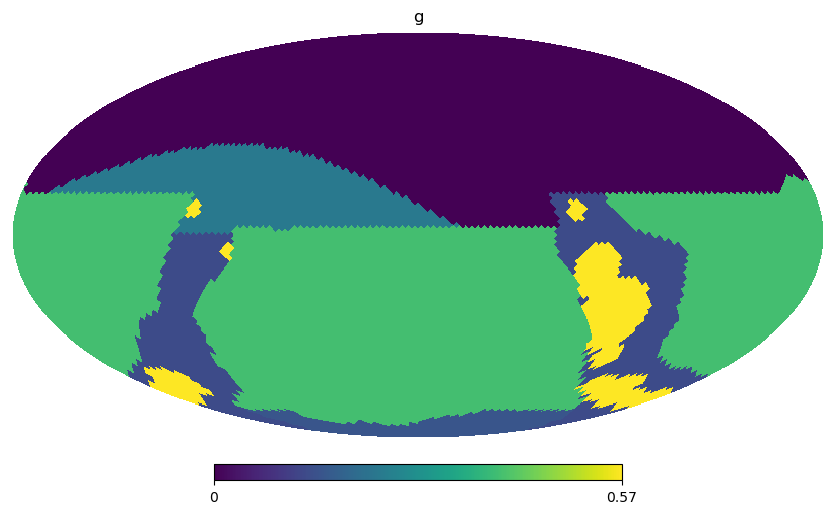

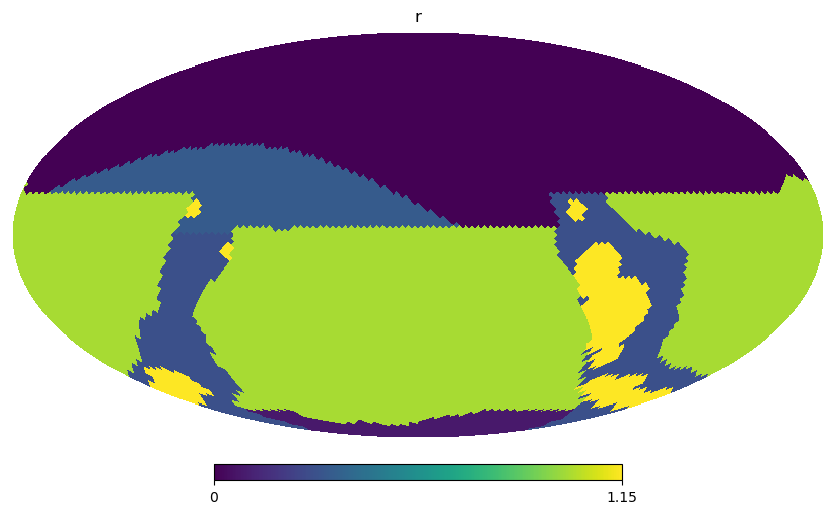

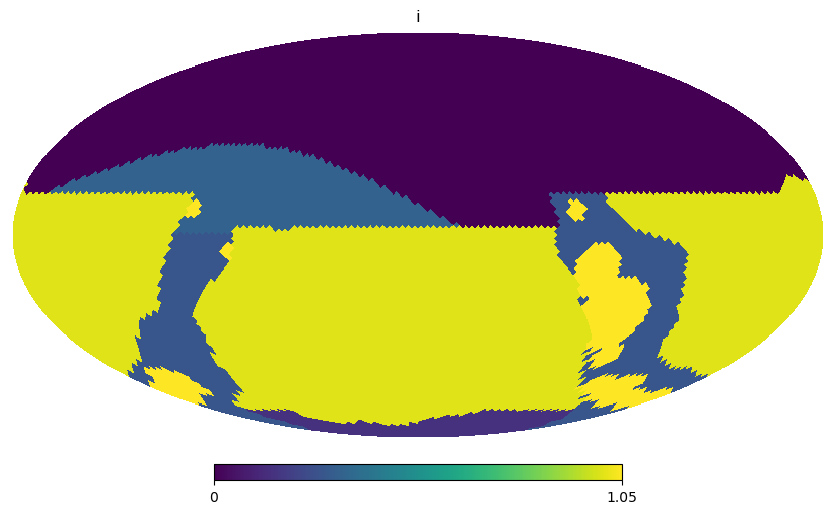

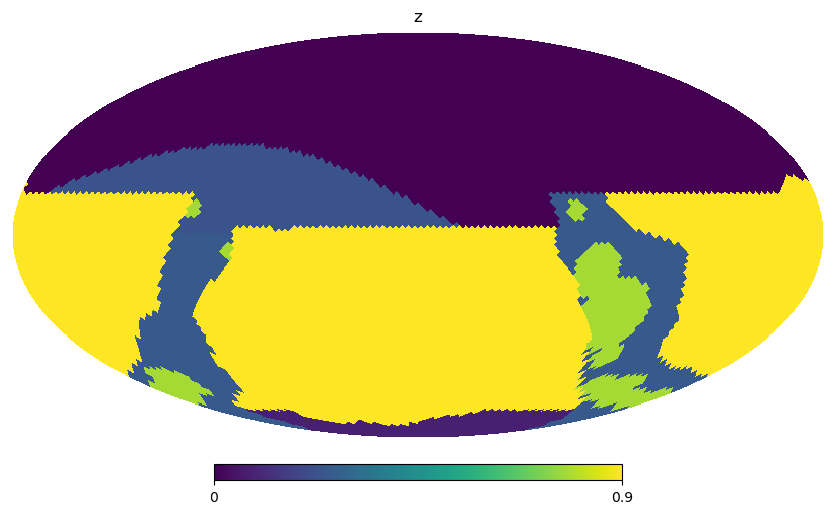

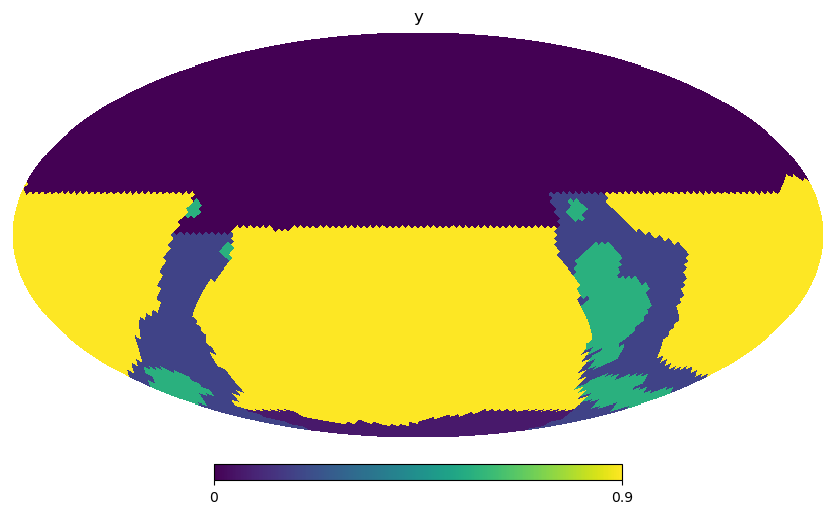

In [6]:
for key in footprints_hp_array.dtype.names:
    hp.mollview(footprints_hp_array[key], title=key)

In [7]:
np.unique(labels)

array(['', 'LMC_SMC', 'bulgy', 'dusty_plane', 'euclid_overlap', 'lowdust',
       'nes', 'scp', 'virgo'], dtype='<U20')

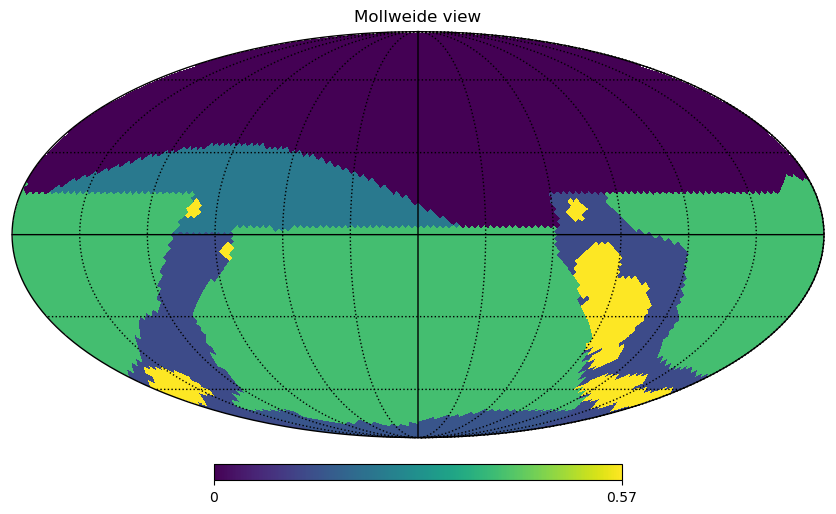

In [8]:
hp.mollview(footprints_hp_array['g'])
hp.graticule()

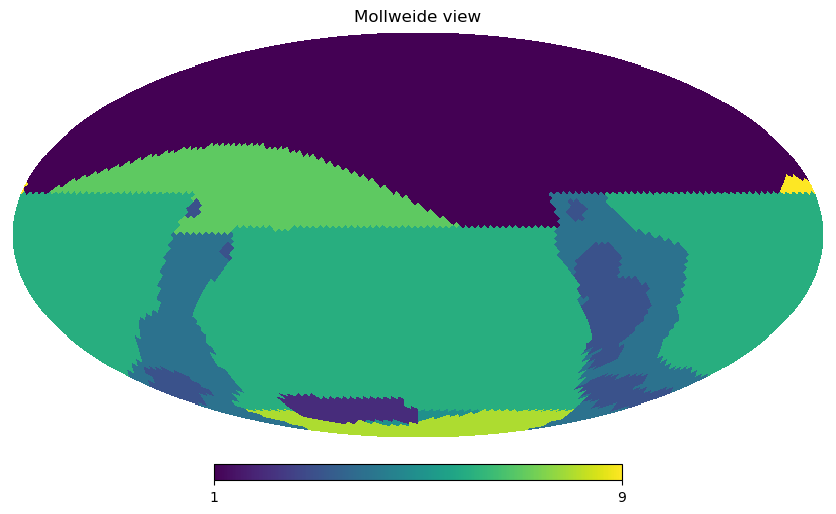

In [9]:
label_map = footprints_hp_array['g']*0
val = 1
for label in np.unique(labels):
    indx = np.where(labels == label)
    label_map[indx] = val
    val += 1
hp.mollview(label_map)

In [10]:
np.unique(labels)

array(['', 'LMC_SMC', 'bulgy', 'dusty_plane', 'euclid_overlap', 'lowdust',
       'nes', 'scp', 'virgo'], dtype='<U20')

In [11]:
ra_cen = 0
dec_cen = -50
contour_x, contour_y = gnomonic_project_toxy(euclid_contours['RA'],
                                             euclid_contours['dec'], ra_cen, dec_cen)

map_x, map_y = gnomonic_project_toxy(fp.ra, fp.dec, ra_cen, dec_cen)


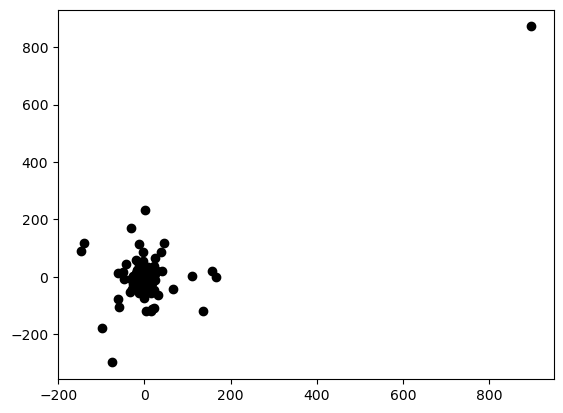

In [12]:
plt.plot(contour_x, contour_y, 'ko')

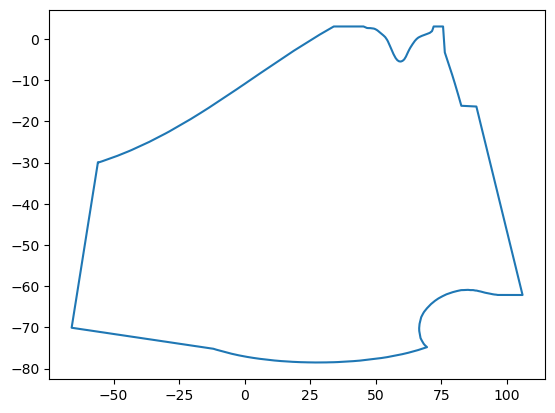

In [13]:
plt.plot(euclid_contours['RA'], euclid_contours['dec'])